In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 



In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True)
#As from data.info we know there are some null values in total_edrooms feature
#so this will drop those values and inplace will save the datset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data[('median_house_value')]
#X main dataset hay jis main sirf features hain without target
#Y main sirf target ka column hay

In [20]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [22]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
#dataset is split into 20% reserved for testing and 80% for training

In [8]:
train_data=x_train.join(y_train)
#this will join the target variable y with training features,
#this dataset will be 80% of the original to be trained.

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16172,-122.54,37.72,17.0,2975.0,968.0,1453.0,828.0,3.5270,NEAR OCEAN,318900.0
5634,-118.28,33.74,40.0,1751.0,512.0,1939.0,503.0,1.5394,NEAR OCEAN,200000.0
6765,-118.13,34.11,45.0,1780.0,289.0,755.0,328.0,4.8250,<1H OCEAN,351100.0
19436,-121.00,37.69,18.0,3469.0,661.0,1452.0,628.0,3.4079,INLAND,147500.0
12976,-121.31,38.67,27.0,1998.0,353.0,970.0,343.0,4.8224,INLAND,115500.0
...,...,...,...,...,...,...,...,...,...,...
15885,-122.40,37.74,45.0,2462.0,509.0,1587.0,450.0,2.5900,NEAR BAY,211800.0
18363,-122.11,37.31,7.0,189.0,26.0,84.0,29.0,13.8093,<1H OCEAN,500001.0
18839,-122.73,41.76,19.0,2200.0,414.0,950.0,367.0,2.5357,INLAND,94200.0
16122,-122.46,37.78,52.0,3429.0,773.0,1584.0,696.0,3.7887,NEAR BAY,500001.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

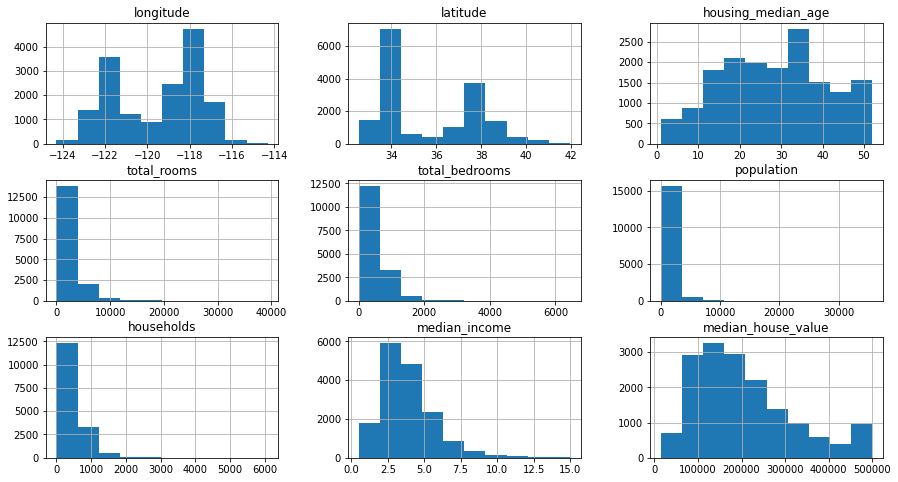

In [9]:
train_data.hist(figsize=(15,8))

In [19]:
trainn_data=train_data.drop(['ocean_proximity'],axis=1)

In [40]:
trainn_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19231,-122.65,38.46,14.0,2096.0,420.0,926.0,397.0,4.0647,187800.0
10862,-117.87,33.70,21.0,3648.0,654.0,2266.0,628.0,5.0956,246000.0
18405,-121.86,37.25,16.0,6958.0,1300.0,2965.0,1217.0,4.2885,262400.0
5739,-118.24,34.16,52.0,1904.0,297.0,797.0,286.0,6.6603,380400.0
12243,-116.99,33.75,18.0,9601.0,2401.0,4002.0,2106.0,1.4366,77000.0
...,...,...,...,...,...,...,...,...,...
9422,-122.66,37.93,42.0,1505.0,324.0,553.0,277.0,4.1792,350000.0
17605,-121.89,37.30,46.0,2639.0,448.0,938.0,424.0,5.0662,331600.0
11958,-117.40,33.90,32.0,1263.0,178.0,508.0,180.0,3.6667,314100.0
5179,-118.26,33.95,44.0,1771.0,378.0,1296.0,399.0,1.6389,96700.0


In [41]:
trainn_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924991,-0.110751,0.045785,0.070995,0.105960,0.057609,-0.017284,-0.052959
latitude,-0.924991,1.000000,0.013778,-0.034919,-0.066574,-0.112272,-0.070893,-0.075928,-0.136247
housing_median_age,-0.110751,0.013778,1.000000,-0.362526,-0.319169,-0.295808,-0.300535,-0.120585,0.105226
total_rooms,0.045785,-0.034919,-0.362526,1.000000,0.929072,0.851971,0.917983,0.197995,0.135368
total_bedrooms,0.070995,-0.066574,-0.319169,0.929072,1.000000,0.873088,0.979715,-0.012039,0.050077
population,0.105960,-0.112272,-0.295808,0.851971,0.873088,1.000000,0.901776,0.001321,-0.027324
households,0.057609,-0.070893,-0.300535,0.917983,0.979715,0.901776,1.000000,0.009937,0.066196
median_income,-0.017284,-0.075928,-0.120585,0.197995,-0.012039,0.001321,0.009937,1.000000,0.687668
median_house_value,-0.052959,-0.136247,0.105226,0.135368,0.050077,-0.027324,0.066196,0.687668,1.000000


<Figure size 1080x576 with 0 Axes>

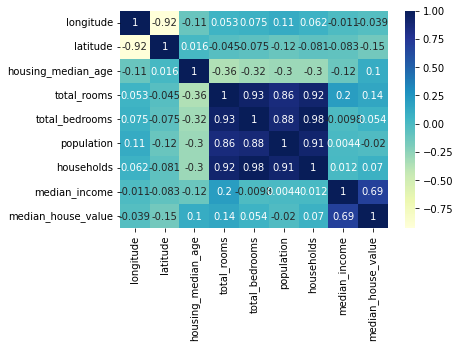

<Figure size 1080x576 with 0 Axes>

In [20]:
sns.heatmap(trainn_data.corr(), annot=True, cmap="YlGnBu")
plt.figure(figsize=(15,8))
#heatmap apke features ke correlations dikhata hay ke aik feature ke 
#change hone se doosre pe kitna effect parega, annot BASICALLY apki 
#correlaton ki values dikhayega, cmap colors set karega.

In [10]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

#we did this to make the histogram a more bell curved shape

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

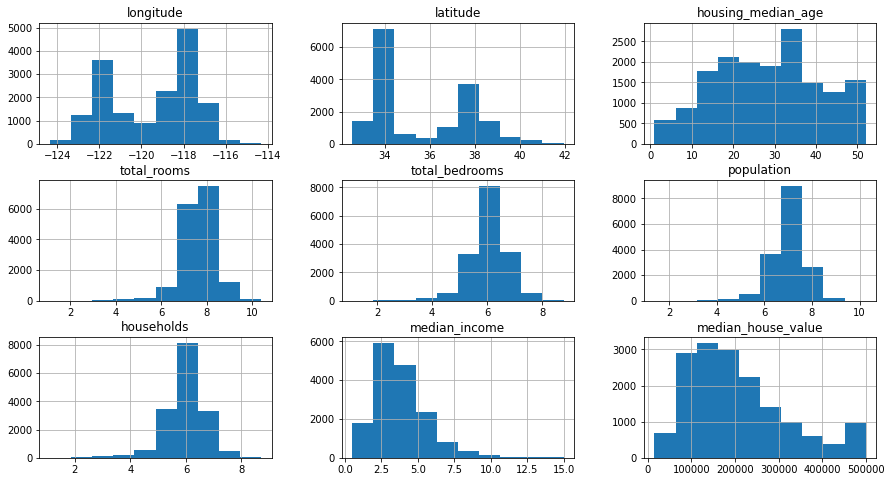

In [38]:
train_data.hist(figsize=(15, 8))

In [11]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7150
INLAND        5292
NEAR OCEAN    2102
NEAR BAY      1798
ISLAND           4
Name: count, dtype: int64

In [14]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
#hot one encoding the ocean proximity column because it got strings

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1943,-120.91,38.62,12.0,8.422003,6.618739,7.617760,6.577861,4.1843,207600.0,False,True,False,False,False
12359,-116.53,33.78,18.0,7.843064,6.139885,6.021023,5.370638,2.5489,220500.0,False,True,False,False,False
1841,-122.29,37.91,46.0,7.643004,5.849325,6.618739,5.872118,4.0536,262000.0,False,False,False,True,False
17358,-120.43,34.87,26.0,7.438384,5.609472,6.684612,5.587249,3.9871,157700.0,True,False,False,False,False
2551,-124.16,40.77,35.0,7.669495,6.084499,6.960348,6.075346,2.8529,85600.0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18930,-122.14,38.07,31.0,8.132119,6.424869,7.467942,6.401917,4.6761,143100.0,False,False,False,True,False
13737,-117.21,34.04,14.0,8.027477,6.056784,7.359468,6.040255,6.2917,224700.0,False,True,False,False,False
18948,-121.98,38.29,4.0,9.080118,7.163947,8.296796,7.080868,5.4399,187100.0,False,True,False,False,False
10871,-117.91,33.72,32.0,7.798523,6.224558,7.951559,6.248043,4.5607,182100.0,True,False,False,False,False


In [16]:
train_data['<1H OCEAN'] = train_data['<1H OCEAN'].astype(int)
train_data['INLAND'] = train_data['INLAND'].astype(int)
train_data['ISLAND'] = train_data['ISLAND'].astype(int)
train_data['NEAR BAY'] = train_data['NEAR BAY'].astype(int)
train_data['NEAR OCEAN'] = train_data['NEAR OCEAN'].astype(int)
#changing their string of true and false as 0 and 1

In [55]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16172,-122.54,37.72,17.0,7.998335,6.876265,7.282074,6.720220,3.5270,318900.0,0,0,0,0,1
5634,-118.28,33.74,40.0,7.468513,6.240276,7.570443,6.222576,1.5394,200000.0,0,0,0,0,1
6765,-118.13,34.11,45.0,7.484930,5.669881,6.628041,5.796058,4.8250,351100.0,1,0,0,0,0
19436,-121.00,37.69,18.0,8.151910,6.495266,7.281386,6.444131,3.4079,147500.0,0,1,0,0,0
12976,-121.31,38.67,27.0,7.600402,5.869297,6.878326,5.840642,4.8224,115500.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,-122.40,37.74,45.0,7.809135,6.234411,7.370231,6.111467,2.5900,211800.0,0,0,0,1,0
18363,-122.11,37.31,7.0,5.247024,3.295837,4.442651,3.401197,13.8093,500001.0,1,0,0,0,0
18839,-122.73,41.76,19.0,7.696667,6.028279,6.857514,5.908083,2.5357,94200.0,0,1,0,0,0
16122,-122.46,37.78,52.0,8.140316,6.651572,7.368340,6.546785,3.7887,500001.0,0,0,0,1,0


In [17]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924924,-0.109859,0.031951,0.061658,0.111868,0.057976,-0.010977,-0.042932,0.316613,-0.057082,0.009444,-0.471872,0.051206
latitude,-0.924924,1.000000,0.015086,-0.036460,-0.071119,-0.140143,-0.091816,-0.083391,-0.146685,-0.442609,0.352268,-0.016629,0.355148,-0.167661
housing_median_age,-0.109859,0.015086,1.000000,-0.314441,-0.271486,-0.241001,-0.240689,-0.127533,0.096474,0.040300,-0.226437,0.014173,0.255397,0.017409
total_rooms,0.031951,-0.036460,-0.314441,1.000000,0.945755,0.867891,0.931745,0.211531,0.159735,0.024563,-0.018031,-0.009731,-0.018115,0.006189
total_bedrooms,0.061658,-0.071119,-0.271486,0.945755,1.000000,0.900305,0.974420,-0.020602,0.052738,0.043416,-0.049995,-0.003413,-0.016525,0.021149
population,0.111868,-0.140143,-0.241001,0.867891,0.900305,1.000000,0.934851,-0.000611,-0.020357,0.113677,-0.074977,-0.013831,-0.059162,-0.007713
households,0.057976,-0.091816,-0.240689,0.931745,0.974420,0.934851,1.000000,0.009273,0.073072,0.073665,-0.091712,-0.009869,-0.006164,0.025251
median_income,-0.010977,-0.083391,-0.127533,0.211531,-0.020602,-0.000611,0.009273,1.000000,0.691916,0.175838,-0.239398,-0.010590,0.052342,0.025622
median_house_value,-0.042932,-0.146685,0.096474,0.159735,0.052738,-0.020357,0.073072,0.691916,1.000000,0.266964,-0.488428,0.026421,0.157574,0.138580
<1H OCEAN,0.316613,-0.442609,0.040300,0.024563,0.043416,0.113677,0.073665,0.175838,0.266964,1.000000,-0.610104,-0.013795,-0.309989,-0.338730


<Axes: >

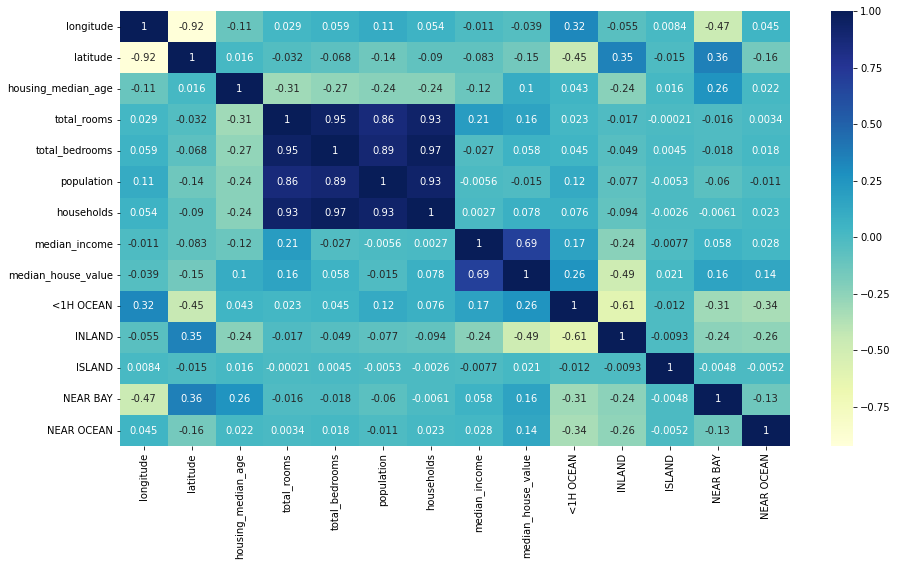

In [69]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: xlabel='latitude', ylabel='longitude'>

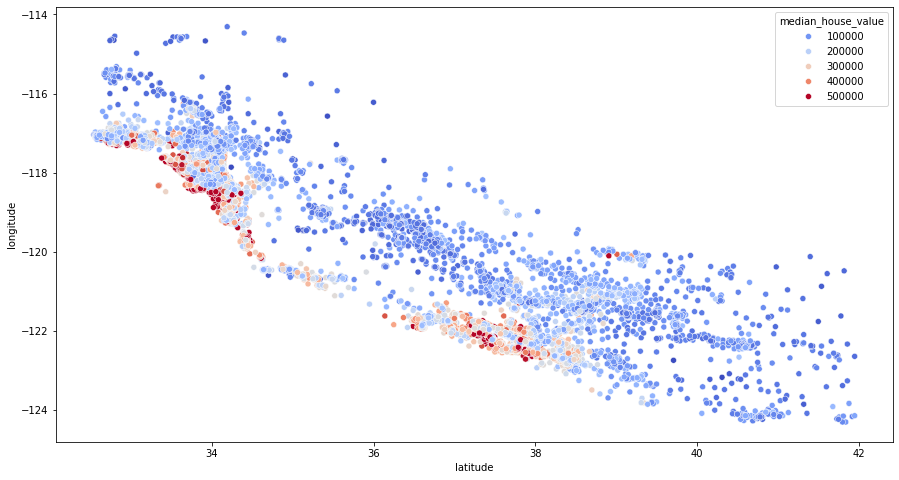

In [18]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=train_data, x = "latitude", y = "longitude", hue= "median_house_value", palette="coolwarm")

In [57]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

In [58]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1943,-120.91,38.62,12.0,2.243048,2.030611,2.153825,2.025231,4.1843,207600.0,0,1,0,0,0,0.905291,1.107552
12359,-116.53,33.78,18.0,2.179633,1.965697,1.948909,1.851700,2.5489,220500.0,0,1,0,0,0,0.901847,1.177099
1841,-122.29,37.91,46.0,2.156750,1.924150,2.030611,1.927472,4.0536,262000.0,0,0,0,1,0,0.892153,1.118953
17358,-120.43,34.87,26.0,2.132791,1.888504,2.039220,1.885136,3.9871,157700.0,1,0,0,0,0,0.885461,1.131373
2551,-124.16,40.77,35.0,2.159811,1.957909,2.074473,1.956616,2.8529,85600.0,0,0,0,0,1,0.906519,1.103850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18930,-122.14,38.07,31.0,2.211798,2.004835,2.136288,2.001739,4.6761,143100.0,0,0,0,1,0,0.906428,1.104938
13737,-117.21,34.04,14.0,2.200273,1.953989,2.123395,1.951644,6.2917,224700.0,0,1,0,0,0,0.888067,1.127394
18948,-121.98,38.29,4.0,2.310565,2.099728,2.229670,2.089499,5.4399,187100.0,0,1,0,0,0,0.908751,1.105798
10871,-117.91,33.72,32.0,2.174584,1.977486,2.191828,1.980731,4.5607,182100.0,1,0,0,0,0,0.909363,1.097869


<Axes: >

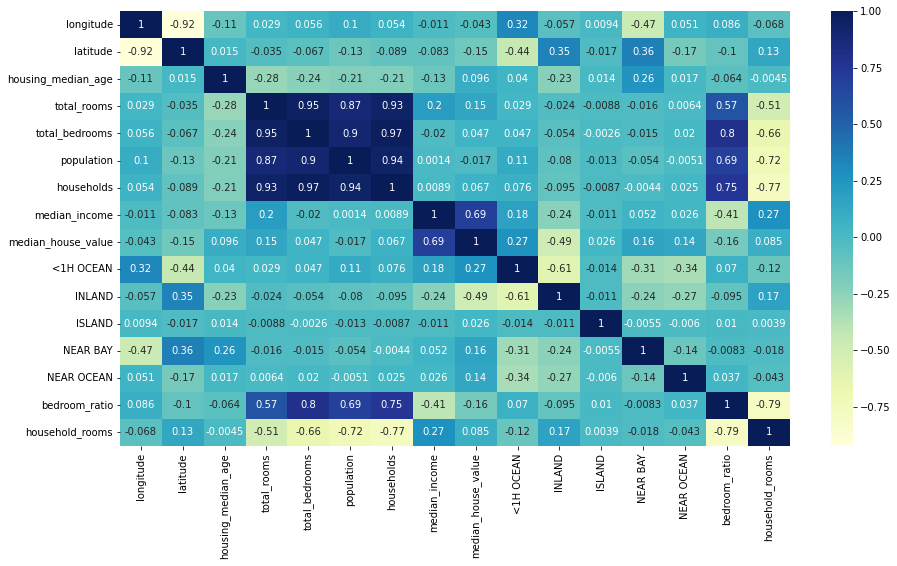

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = train_data.drop(['median_house_value'], axis=1)
y_train =  train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)
reg = LinearRegression()
reg.fit(x_train_s, y_train)

LinearRegression()

In [62]:
LinearRegression()

LinearRegression()

In [63]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,median_house_value
3373,-118.30,34.26,37.0,2.191236,2.008489,2.127062,1.995058,3.5568,1,0,0,0,0,0.811960,184500.0
9161,-118.49,34.42,23.0,2.233766,2.032004,2.156584,2.029731,4.4107,1,0,0,0,0,0.795369,213400.0
15285,-117.33,33.16,29.0,2.216757,1.989976,2.120540,1.988233,4.0585,0,0,0,0,1,0.772283,245500.0
9831,-121.93,36.63,28.0,2.228943,2.047533,2.124305,2.035752,3.5147,0,0,0,0,1,0.814080,313900.0
6860,-118.15,34.05,33.0,2.208058,2.011828,2.138490,2.012648,3.8472,1,0,0,0,0,0.799820,293300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9921,-122.32,38.32,19.0,2.195041,1.950966,2.092881,1.959189,5.8002,0,0,0,1,0,0.756291,238700.0
2390,-119.46,36.91,12.0,2.197226,1.974994,2.089082,1.954981,3.9141,0,1,0,0,0,0.775821,123900.0
7914,-118.08,33.88,30.0,2.146009,1.981529,2.185580,1.975273,3.2639,1,0,0,0,0,0.828249,120100.0
11815,-121.10,38.95,17.0,2.115905,1.946112,2.060530,1.931109,2.1287,0,1,0,0,0,0.822439,55300.0


In [64]:
test_data=x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['<1H OCEAN'] = test_data['<1H OCEAN'].astype(int)
test_data['INLAND'] = test_data['INLAND'].astype(int)
test_data['ISLAND'] = test_data['ISLAND'].astype(int)
test_data['NEAR BAY'] = test_data['NEAR BAY'].astype(int)
test_data['NEAR OCEAN'] = test_data['NEAR OCEAN'].astype(int)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']
#hot one encoding the ocean proximity column because it got strings

AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [66]:
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

In [67]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,median_house_value,household_rooms
3373,-118.30,34.26,37.0,2.191236,2.008489,2.127062,1.995058,3.5568,1,0,0,0,0,0.916601,184500.0,1.098332
9161,-118.49,34.42,23.0,2.233766,2.032004,2.156584,2.029731,4.4107,1,0,0,0,0,0.909677,213400.0,1.100523
15285,-117.33,33.16,29.0,2.216757,1.989976,2.120540,1.988233,4.0585,0,0,0,0,1,0.897697,245500.0,1.114938
9831,-121.93,36.63,28.0,2.228943,2.047533,2.124305,2.035752,3.5147,0,0,0,0,1,0.918612,313900.0,1.094899
6860,-118.15,34.05,33.0,2.208058,2.011828,2.138490,2.012648,3.8472,1,0,0,0,0,0.911130,293300.0,1.097091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9921,-122.32,38.32,19.0,2.195041,1.950966,2.092881,1.959189,5.8002,0,0,0,1,0,0.888806,238700.0,1.120382
2390,-119.46,36.91,12.0,2.197226,1.974994,2.089082,1.954981,3.9141,0,1,0,0,0,0.898858,123900.0,1.123912
7914,-118.08,33.88,30.0,2.146009,1.981529,2.185580,1.975273,3.2639,1,0,0,0,0,0.923356,120100.0,1.086436
11815,-121.10,38.95,17.0,2.115905,1.946112,2.060530,1.931109,2.1287,0,1,0,0,0,0.919754,55300.0,1.095694


In [68]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1943,-120.91,38.62,12.0,2.243048,2.030611,2.153825,2.025231,4.1843,207600.0,0,1,0,0,0,0.905291,1.107552
12359,-116.53,33.78,18.0,2.179633,1.965697,1.948909,1.851700,2.5489,220500.0,0,1,0,0,0,0.901847,1.177099
1841,-122.29,37.91,46.0,2.156750,1.924150,2.030611,1.927472,4.0536,262000.0,0,0,0,1,0,0.892153,1.118953
17358,-120.43,34.87,26.0,2.132791,1.888504,2.039220,1.885136,3.9871,157700.0,1,0,0,0,0,0.885461,1.131373
2551,-124.16,40.77,35.0,2.159811,1.957909,2.074473,1.956616,2.8529,85600.0,0,0,0,0,1,0.906519,1.103850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18930,-122.14,38.07,31.0,2.211798,2.004835,2.136288,2.001739,4.6761,143100.0,0,0,0,1,0,0.906428,1.104938
13737,-117.21,34.04,14.0,2.200273,1.953989,2.123395,1.951644,6.2917,224700.0,0,1,0,0,0,0.888067,1.127394
18948,-121.98,38.29,4.0,2.310565,2.099728,2.229670,2.089499,5.4399,187100.0,0,1,0,0,0,0.908751,1.105798
10871,-117.91,33.72,32.0,2.174584,1.977486,2.191828,1.980731,4.5607,182100.0,1,0,0,0,0,0.909363,1.097869


In [69]:
x_test = test_data.drop(['median_house_value'], axis=1)
y_test =  test_data['median_house_value']

In [80]:
x_test_s = scaler.transform(x_test)

In [81]:
reg.score(x_test_s, y_test)

0.6491512133535184

In [85]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [86]:
forest.score(x_test_s, y_test)

0.80951751459882